# MVP Análise de Dados e Boas Práticas
**Nome:** Gabriel Pugliese Salgado

**Matrícula:** 4052025001039

**Dataset:** Inadimplência_quantitativa_2

# Descrição do Problema

O conjunto de dados de inadimplência quantitativa é composto por informações financeiras e comportamentais de clientes de uma instituição de crédito. O objetivo principal é prever a propensão à inadimplência de um cliente, a fim de auxiliar na implementação de políticas de crédito mais eficientes e reduzir os riscos financeiros da instituição.

## Hipóteses do Problema

As hipóteses que formulei para este problema são:

1. Clientes com maior número de atrasos tendem a ter maior probabilidade de inadimplência.

2. Regiões de risco mais altas (III e IV) estão associadas a maior inadimplência.

3. Clientes com menor tempo de relacionamento (TempoRel) apresentam maior risco.

4. Existe uma relação entre o valor médio da fatura e a capacidade de pagamento (RendaMensal).

5. Um alto percentual de gastos com alimentação pode estar relacionado a menor capacidade de pagamento.

## Tipo de Problema

Este é um problema de classificação supervisionada. Com base em variáveis como histórico de atrasos, região de risco, renda mensal, entre outras, o objetivo é prever se um cliente será adimplente (0) ou inadimplente (1).

## Seleção de Dados

O conjunto de dados é uma base hipotética e foi carregado a partir de um arquivo CSV contendo 10.986 registros de clientes. As colunas estão delimitadas por ponto e vírgula (;). A base já está estruturada, mas será necessário um pré-processamento para verificar instâncias vazias e transformar variáveis categóricas (como RegRisc) em numéricas, além de normalizar variáveis contínuas.

## Atributos do Dataset
O dataset contém as seguintes variáveis:

- ***cliente:*** Identificador único do cliente.

- ***Resposta:*** Variável alvo (0 = adimplente, 1 = inadimplente).

- ***RegRisc:*** Região de risco do cliente (categorias: I, II, III, IV).

- ***Atrasos:*** Número de dias de atraso nos pagamentos.

- ***TempoRel:*** Tempo de relacionamento com a instituição (em dias).

- ***valorFatura:*** Valor médio da fatura mensal.

- ***GastosAlim:*** Percentual dos gastos do cliente com alimentação.

- ***RendaMensal:*** Renda mensal do cliente.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Inadimplencia_quantitativa_2.

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [343]:
# carregamento do dataset
df = pd.read_csv("/content/Inadimplencia_quantitativa_2.csv", sep=";")

In [344]:
# Primeiras linhas do dataframe
df.head()

,cliente,Resposta,RegRisc,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
0,2,0,III,2,5148,62,4,4364
1,6,0,I,7,5030,163,17,4351
2,8,1,II,12,235,250,16,1375
3,9,1,I,37,300,381,64,1777
4,13,0,I,7,223,8055,10,3909


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Inadimplência_quantitava_2, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

### Total de Tipo das Instâncias

O dataset possui 10.986 instâncias (observações) e 8 colunas. A maior parte das variáveis é do tipo numérico inteiro (int), com exceção da coluna RegRisc, que é do tipo categórico (object).

In [345]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 10986

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cliente      10986 non-null  int64 
 1   Resposta     10986 non-null  int64 
 2   RegRisc      10986 non-null  object
 3   Atrasos      10986 non-null  int64 
 4   TempoRel     10986 non-null  int64 
 5   valorFatura  10986 non-null  int64 
 6   GastosAlim   10986 non-null  int64 
 7   RendaMensal  10986 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 686.8+ KB
None


A coluna 'cliente' não deve ser tratadas como valor numérico:
- 'cliente' é apenas um identificador e deve ser convertido para string (object);

In [346]:
df['cliente'] = df['cliente'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cliente      10986 non-null  object
 1   Resposta     10986 non-null  int64 
 2   RegRisc      10986 non-null  object
 3   Atrasos      10986 non-null  int64 
 4   TempoRel     10986 non-null  int64 
 5   valorFatura  10986 non-null  int64 
 6   GastosAlim   10986 non-null  int64 
 7   RendaMensal  10986 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 686.8+ KB


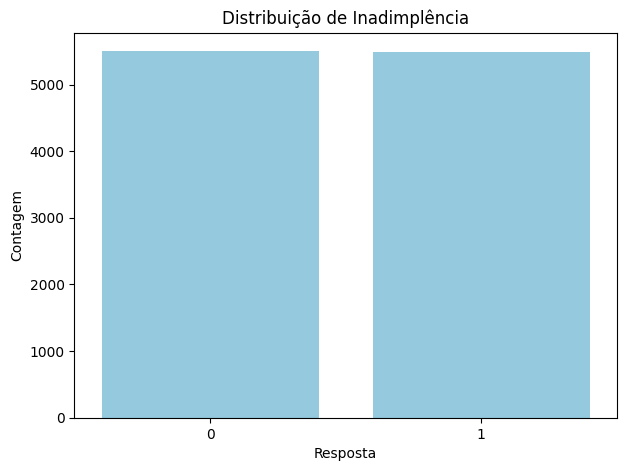

In [347]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Resposta', data=df, color='skyblue')
plt.title('Distribuição de Inadimplência')
plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.show()

In [348]:
# Verificando a tabela de frequência da variável Resposta do modelo
Resposta =pd.pivot_table(df, index='Resposta', values='cliente', aggfunc=np.count_nonzero)
Resposta['%'] = ((pd.pivot_table(df, index='Resposta', values = 'cliente', aggfunc=np.count_nonzero)/df['cliente'].count())*100).round(2)

Resposta

,cliente,%
Resposta,,
0,5503,50.09
1,5483,49.91


Com apenas o gráfico de distribuição, é possível perceber que o dataset está bem balanceado em termos de clientes adimplentes (Resposta = 0) e inadimplentes (Resposta = 1). A tabela de frequência da variável Resposta mostra que 50,09% dos registros correspondem a clientes adimplentes, enquanto 49,91% são inadimplentes.

# Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [349]:
# estatísticas descritivas básicas do dataset
df.describe()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
count,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000
mean,0.499090,19.687147,1796.758147,1400.987348,27.069634,6053.556800
std,0.500022,17.716952,1610.791743,2405.437586,22.992852,7434.910169
min,0.000000,0.000000,180.000000,45.000000,0.000000,750.000000
25%,0.000000,4.000000,337.000000,207.000000,10.000000,1515.000000
50%,0.000000,15.000000,1144.500000,560.500000,22.000000,2991.000000
75%,1.000000,29.000000,2975.000000,1198.750000,31.000000,4527.250000
max,1.000000,65.000000,5475.000000,100000.000000,90.000000,29986.000000


### Média
A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [350]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Resposta,0.499090
Atrasos,19.687147
TempoRel,1796.758147
valorFatura,1400.987348
GastosAlim,27.069634
RendaMensal,6053.556800


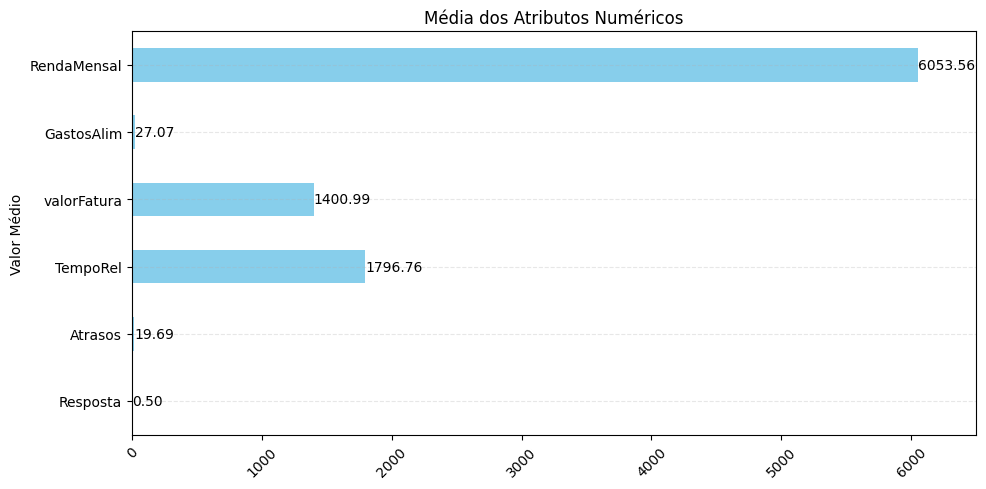

In [351]:
# Dados de média
medias = df.describe().loc['mean']

# Gráfico de barras
plt.figure(figsize=(10, 5))
medias.plot(kind='barh', color='skyblue')
plt.title('Média dos Atributos Numéricos')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xlim([0,6500])

for index, value in enumerate(medias):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

O gráfico de Barras ajuda a entender rapidamente quais atributos têm maior ou menor valor médio.

### Desvio Padrão
O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [352]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Resposta,0.500022
Atrasos,17.716952
TempoRel,1610.791743
valorFatura,2405.437586
GastosAlim,22.992852
RendaMensal,7434.910169


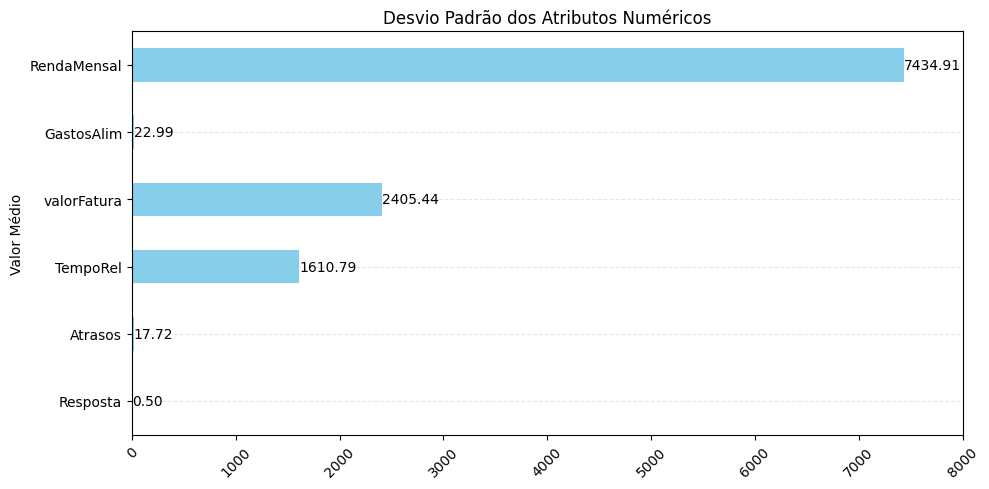

In [353]:
# Dados de desvio padrão
std = df.describe().loc['std']

# Gráfico de barras
plt.figure(figsize=(10, 5))
std.plot(kind='barh', color='skyblue')
plt.title('Desvio Padrão dos Atributos Numéricos')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xlim([0, 8000])

for index, value in enumerate(std):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

Esse gráfico deixa bem claro que os atributos 'RendaMensal', 'valorFatura' e 'TempoRel'possuem valores muito espaçadas, corroborando a hipótese de existência de outliers, que será mais explorada posteriormente.

### Histograma
A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

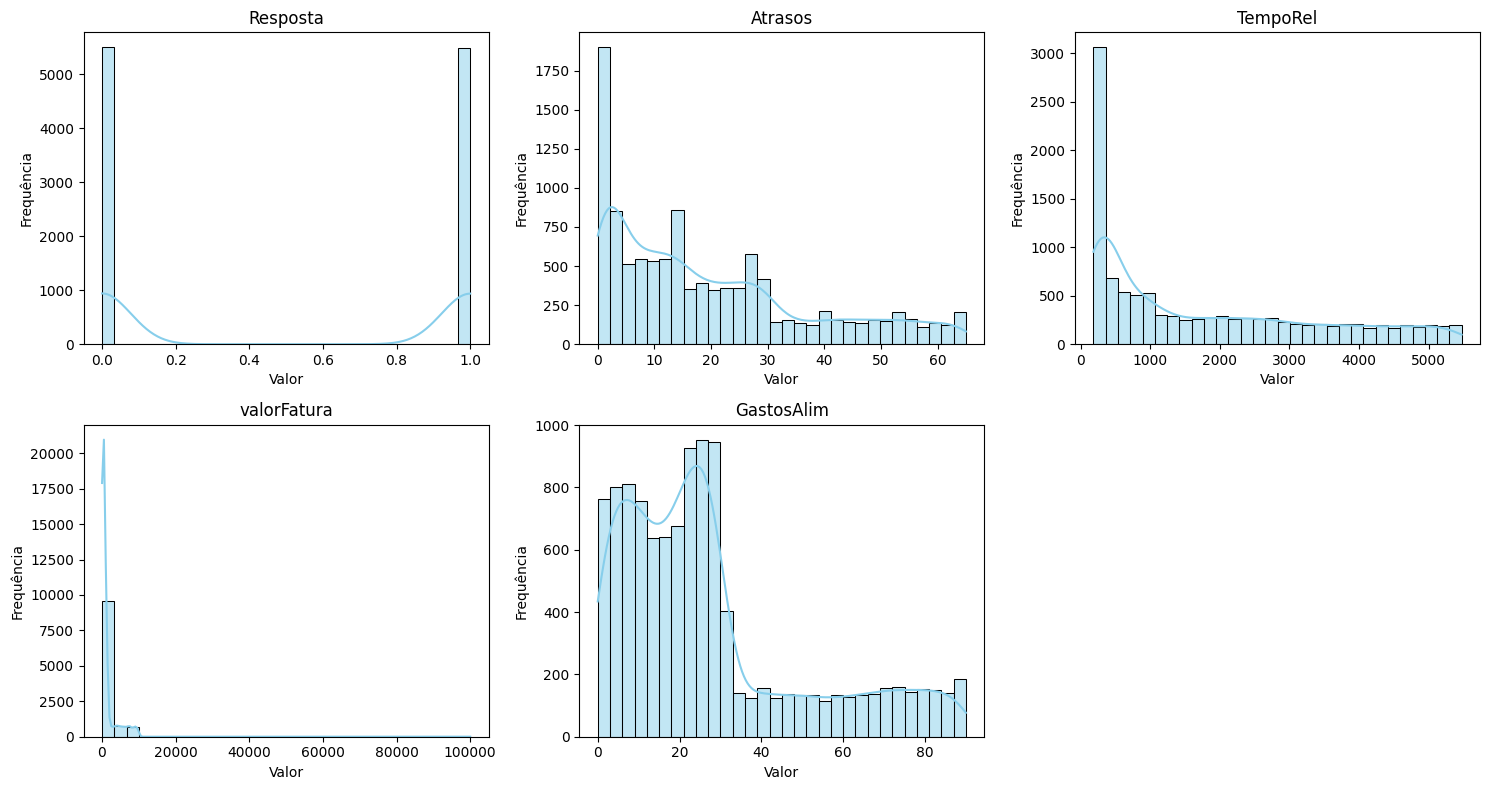

In [354]:
# Selecionando apenas colunas numéricas
numericas = df.select_dtypes(include='number')

# Criando subplots: 2 linhas, 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # tamanho ajustado para boa visualização

# Flatten para iterar mais facilmente
axes = axes.flatten()

# Plotando os histogramas
for i, col in enumerate(numericas):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frequência')

# Removendo o gráfico vazio do último subplot (posição 6)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### Avaliação dos Histogramas
- **Atrasos:**
O histograma mostra uma distribuição altamente assimétrica à direita (concentrada em valores baixos), indicando que a maioria dos clientes teve poucos atrasos. Há uma cauda longa com clientes que apresentaram muitos atrasos, o que sugere possíveis outliers.

- **TempoRel:**
Assim como em “Atrasos”, a maioria dos clientes tem um tempo de relacionamento baixo com a instituição. A distribuição também é assimétrica à direita, com uma grande quantidade de clientes novos e poucos com longos relacionamentos.

- **valorFatura:**
A distribuição é fortemente concentrada próximo de zero, com poucos clientes apresentando faturas extremamente altas. Isso indica que a maior parte dos clientes gasta pouco ou não tem faturas registradas, enquanto uma minoria concentra os valores mais altos ou que o dataset possui outliers discrepantes.

- **GastosAlim:**
A distribuição apresenta dois picos visíveis, sugerindo uma possível distribuição bimodal. Isso pode indicar que há dois grupos distintos de clientes em relação aos seus gastos com alimentação.

- **RendaMensal:**
A maioria dos clientes tem rendas mensais baixas, com poucos ganhando valores mais elevados. A distribuição é assimétrica à direita e pode conter outliers no grupo com maiores rendimentos.

### Boxplot
Para entender as diferenças entre os clientes adimplentes e inadimplentes, devemos olhar como se comportam os valores quando separados. Isso nos permite comparar a média, mediana e desvio padrão das duas respostas, além de visualizar suas distribuições por meio de boxplots.

In [355]:
# Estatísticas descritivas agrupadas por resposta
df.groupby('Resposta').describe()

Atrasos                                                    TempoRel  \
           count       mean        std  min   25%   50%   75%   max    count   
Resposta                                                                       
0         5503.0  12.912593  14.737217  0.0   2.0   8.0  17.0  65.0   5503.0   
1         5483.0  26.486413  17.852070  0.0  12.0  24.0  40.0  65.0   5483.0   

                       ... GastosAlim       RendaMensal               \
                 mean  ...        75%   max       count         mean   
Resposta               ...                                             
0         2126.142468  ...       51.0  90.0      5503.0  6925.033800   
1         1466.172351  ...       25.0  90.0      5483.0  5178.900967   

                                                               
                  std    min     25%     50%     75%      max  
Resposta                                                       
0         7863.399258  750.0  1924.0  3448.0  8562.0  29985.0  
1         6868.868539  750.0  1363.5  2506.0  4136.5  29986.0  

[2 rows x 40 columns]

Vamos analisar cada variável em relação à inadimplência.

/tmp/ipython-input-356-3096933449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resposta', y='Atrasos', data=df, palette='hls')


<Axes: xlabel='Resposta', ylabel='Atrasos'>

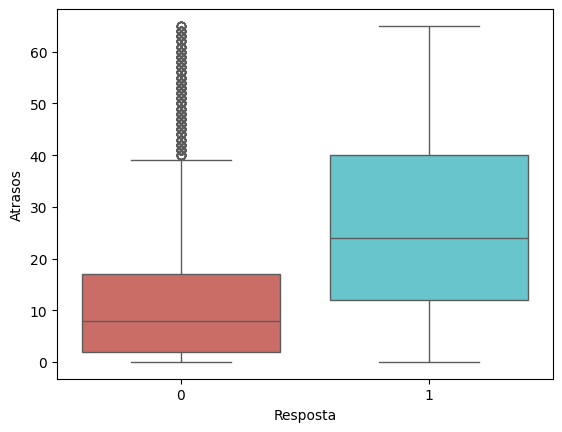

In [356]:
# Atributo Atrasos:

sns.boxplot(x='Resposta', y='Atrasos', data=df, palette='hls')

Os clientes inadimplentes tendem a atrasar mais que os clientes adimplentes.

/tmp/ipython-input-357-4035187528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resposta', y='TempoRel', data=df, palette='hls')


<Axes: xlabel='Resposta', ylabel='TempoRel'>

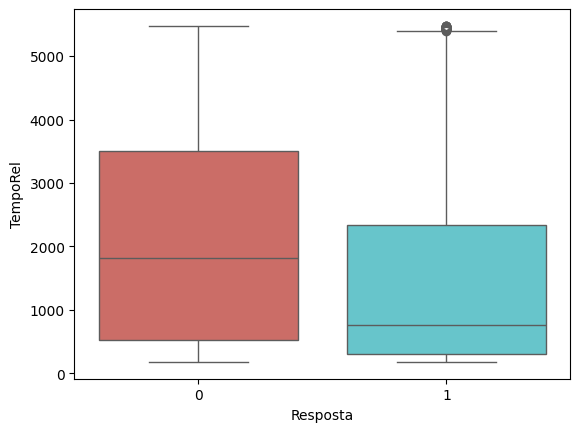

In [357]:
# Atributo Tempo de Relacionamento:

sns.boxplot(x='Resposta', y='TempoRel', data=df, palette='hls')

Os clientes adimplentes possuem maior tempo de relacionamento com a instituição do que os clientes inadimplentes.

In [358]:
# Vamos transformar a variável TempoRel em anos
df['TempoRel'] = df['TempoRel']/365
df.describe()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
count,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000
mean,0.499090,19.687147,4.922625,1400.987348,27.069634,6053.556800
std,0.500022,17.716952,4.413128,2405.437586,22.992852,7434.910169
min,0.000000,0.000000,0.493151,45.000000,0.000000,750.000000
25%,0.000000,4.000000,0.923288,207.000000,10.000000,1515.000000
50%,0.000000,15.000000,3.135616,560.500000,22.000000,2991.000000
75%,1.000000,29.000000,8.150685,1198.750000,31.000000,4527.250000
max,1.000000,65.000000,15.000000,100000.000000,90.000000,29986.000000


/tmp/ipython-input-359-1831268559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resposta', y='TempoRel', data=df, palette='hls')


<Axes: xlabel='Resposta', ylabel='TempoRel'>

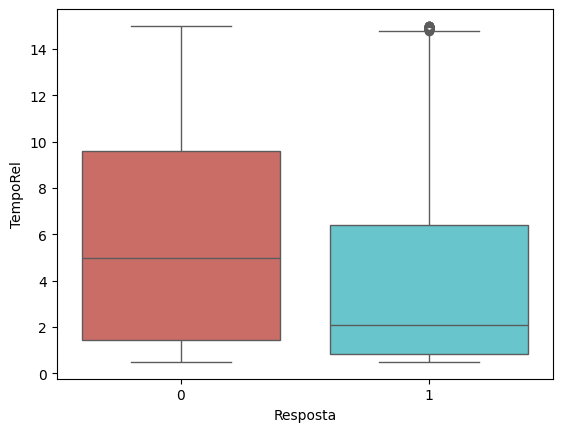

In [359]:
# Atributo Tempo de Relacionamento (em anos):

sns.boxplot(x='Resposta', y='TempoRel', data=df, palette='hls')

/tmp/ipython-input-360-3024504794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resposta', y='valorFatura', data=df, palette='hls')


<Axes: xlabel='Resposta', ylabel='valorFatura'>

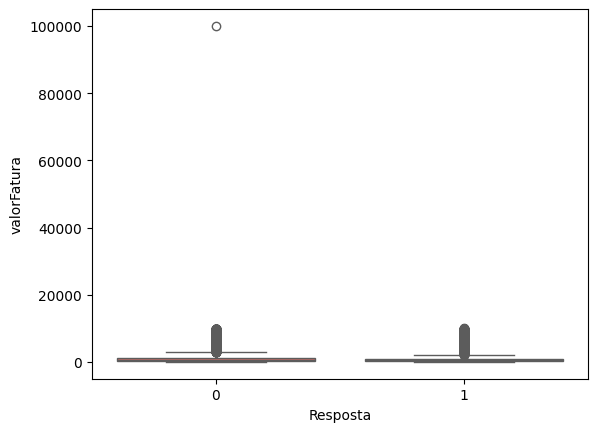

In [360]:
# Atributo Valor da Fatura:

sns.boxplot(x='Resposta', y='valorFatura', data=df, palette='hls')

O gráfico acima comprovou a hipótese de existência de outliers discrepantes. Para eliminá-los, vamos "achatar" o seu valor

/tmp/ipython-input-361-3354909593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resposta', y='valorFatura', data=df, palette='hls')


<Axes: xlabel='Resposta', ylabel='valorFatura'>

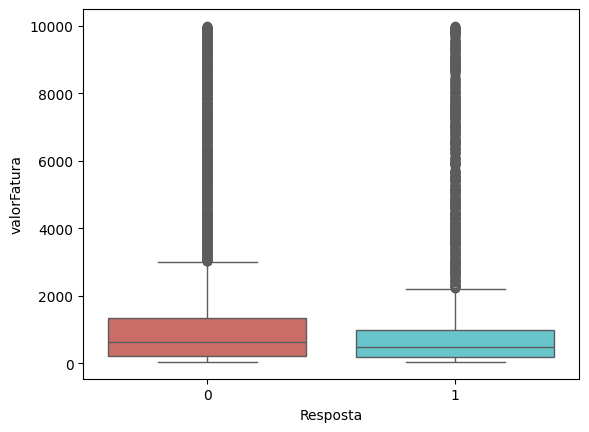

In [361]:
# Achatando os outliers discrepantes
df.loc[Base_Inad['valorFatura']>=50000, 'valorFatura'] = 10000

sns.boxplot(x='Resposta', y='valorFatura', data=df, palette='hls')

É possível perceber a existência de uma quantidade considerável de valores fora do segundo e terceiro quartil, porém a visualização ficou bem mais clara eliminando os outliers.

O comportamento dos clientes varia pouco em relação ao valor da fatura, tendo uma pequena diferença com valores de faturas mais baixas para os inadimplentes.

/tmp/ipython-input-362-3406284017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resposta', y='GastosAlim', data=df, palette='hls')


<Axes: xlabel='Resposta', ylabel='GastosAlim'>

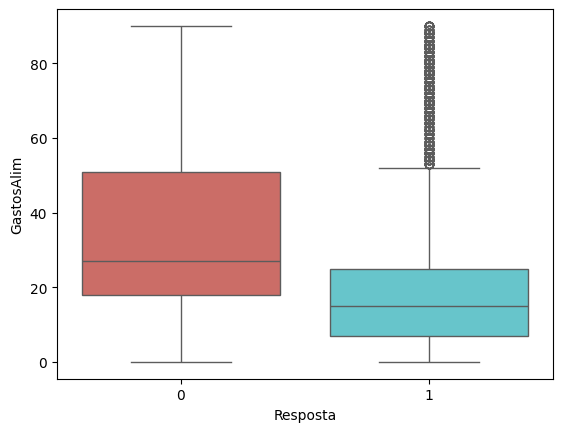

In [362]:
# Atributo Gastos com Alimentação:

sns.boxplot(x='Resposta', y='GastosAlim', data=df, palette='hls')

O clientes inadimplentes tendem a gastar menos com aimentação em comparação com os adimplentes.

/tmp/ipython-input-363-914395296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resposta', y='RendaMensal', data=df, palette='hls')


<Axes: xlabel='Resposta', ylabel='RendaMensal'>

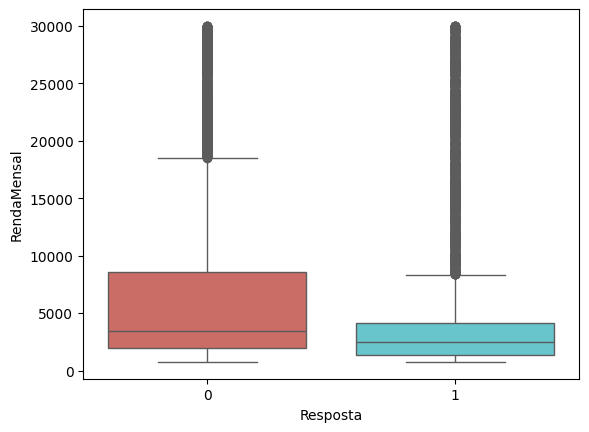

In [363]:
# Atributo Renda Mensal:

sns.boxplot(x='Resposta', y='RendaMensal', data=df, palette='hls')

Assim como vimos com os valores de Fatura, em Renda Mensal a relação com as respostas e menos expressiva do que a de outras variáveis. Mas percebe-se que os clientes inadimplentes possuem uma renda mensal mais baixa que os clientes adimplentes.

### Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos do dataset podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [364]:
# Deixando apenas a coluna Target e as variáveis numéricas (mais a frente será feita a transformação no pré-processamento de dados)
df_numericas = df.drop(columns=['cliente', 'RegRisc'])

# Matriz de correlação
print("\nMatriz de Correlação:")
df_numericas.iloc[:, :].corr()


Matriz de Correlação:


,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
Resposta,1.000000,0.383091,-0.204868,-0.091661,-0.313894,-0.117433
Atrasos,0.383091,1.000000,-0.097851,0.031944,-0.051516,-0.071007
TempoRel,-0.204868,-0.097851,1.000000,0.046844,0.076582,0.073159
valorFatura,-0.091661,0.031944,0.046844,1.000000,0.080987,-0.030705
GastosAlim,-0.313894,-0.051516,0.076582,0.080987,1.000000,0.136543
RendaMensal,-0.117433,-0.071007,0.073159,-0.030705,0.136543,1.000000


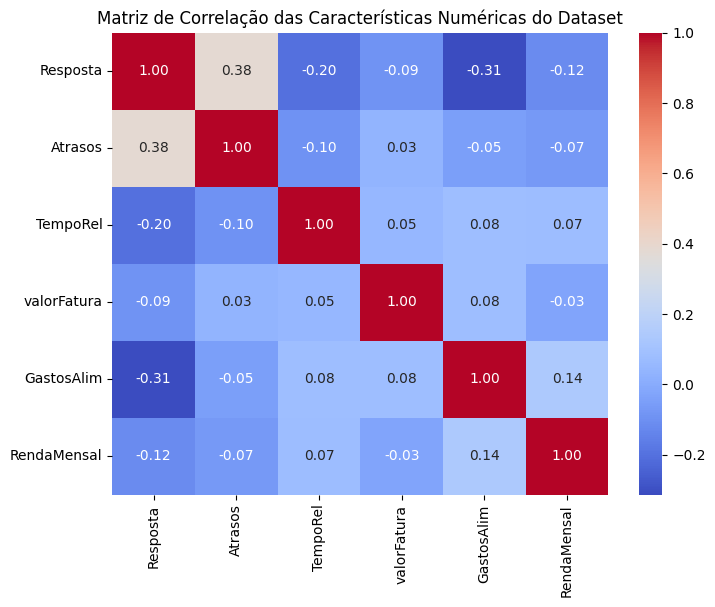

In [365]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df_numericas.iloc[:, :].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Dataset')
plt.show()

Com o mapa de correlação, é possível notar que nenhuma das variáveis possui uma correlação tão significativa com a resposta de inadimplência, o que pode indicar que a relação está mais ligada com a combinação de variáveis do que de uma isoladamente.

### Tratamento de Valores Nulos
O dataset original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [366]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
cliente,0
Resposta,0
RegRisc,0
Atrasos,0
TempoRel,0
valorFatura,0
GastosAlim,0
RendaMensal,0


# Pré-Processamento de Dados
O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Dummy encoding

Visto que a variável de Região de Risco é categórica, precisamos tranformá-la em uma coluna binária.

<Axes: xlabel='Resposta'>

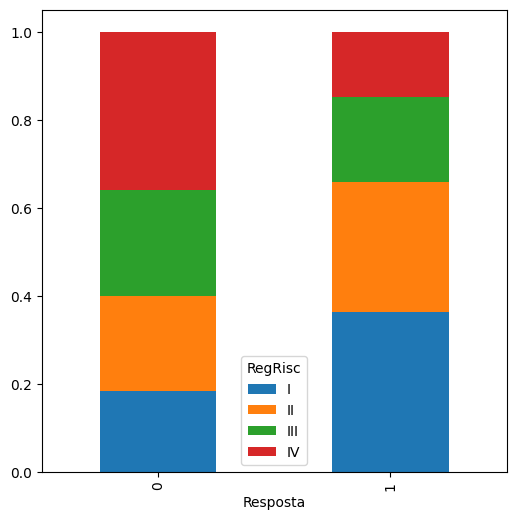

In [367]:
# Comparação entre Região de Risco e Resposta

RegRisc_cat = pd.crosstab(df['Resposta'],df['RegRisc'])
RegRisc_cat.div(RegRisc_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

In [368]:
# Convertendo a variável categórica num indicador dummy
RgRisk = pd.get_dummies(df['RegRisc'],drop_first=True)
# Transforando as variáveis dummies em '0'(False) ou '1'(True)
RgRisk = RgRisk.apply(lambda col: col.astype('uint8'))
RgRisk.head()

,II,III,IV
0,0,1,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [369]:
# Alterando os dados
df.drop(['cliente','RegRisc'],axis=1,inplace=True)
df.head()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
0,0,2,14.104110,62,4,4364
1,0,7,13.780822,163,17,4351
2,1,12,0.643836,250,16,1375
3,1,37,0.821918,381,64,1777
4,0,7,0.610959,8055,10,3909


In [370]:
# Juntando as bases
df_dmy = pd.concat([df,RgRisk],axis=1)
df_dmy.head()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal,II,III,IV
0,0,2,14.104110,62,4,4364,0,1,0
1,0,7,13.780822,163,17,4351,0,0,0
2,1,12,0.643836,250,16,1375,1,0,0
3,1,37,0.821918,381,64,1777,0,0,0
4,0,7,0.610959,8055,10,3909,0,0,0


In [371]:
df_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Resposta     10986 non-null  int64  
 1   Atrasos      10986 non-null  int64  
 2   TempoRel     10986 non-null  float64
 3   valorFatura  10986 non-null  int64  
 4   GastosAlim   10986 non-null  int64  
 5   RendaMensal  10986 non-null  int64  
 6   II           10986 non-null  uint8  
 7   III          10986 non-null  uint8  
 8   IV           10986 non-null  uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 547.3 KB


In [372]:
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento

X = df_dmy.drop('Resposta', axis=1)
y = df_dmy.iloc[:,0].values
X.shape, y.shape


((10986, 8), (10986,))

In [373]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [374]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (7690, 8)
Dimensões de X_test: (3296, 8)
Dimensões de y_train: (7690,)
Dimensões de y_test: (3296,)


## Normalização
A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

In [375]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [376]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [377]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [378]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
    Atrasos  TempoRel  valorFatura  GastosAlim  RendaMensal   II  III   IV
0  1.000000  0.066667     0.124862    0.088889     0.008517  0.0  1.0  0.0
1  0.292308  0.598678     0.015470    0.222222     0.045287  0.0  0.0  1.0
2  0.123077  0.000755     0.009744    0.288889     0.020010  1.0  0.0  0.0
3  0.446154  0.681586     0.065495    0.122222     0.008962  0.0  1.0  0.0
4  0.015385  0.119547     0.103767    0.222222     0.025619  0.0  0.0  1.0


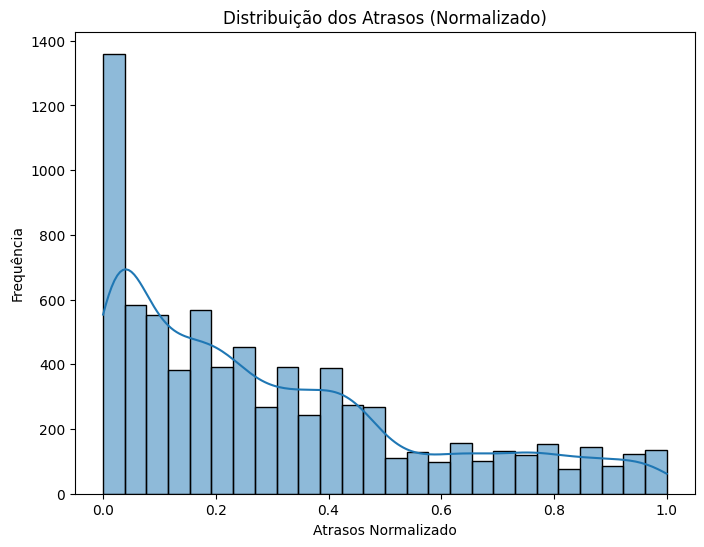

In [379]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Atrasos'], kde=True)
plt.title('Distribuição dos Atrasos (Normalizado)')
plt.xlabel('Atrasos Normalizado')
plt.ylabel('Frequência')
plt.show()

Este histograma mostra que os dados foram normalizados na escala de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [380]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [381]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [382]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [383]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
    Atrasos  TempoRel  valorFatura  GastosAlim  RendaMensal        II  \
0  2.597302 -0.787042    -0.047677   -0.830784    -0.678381 -0.586661   
1 -0.026105  0.960936    -0.538535   -0.307939    -0.532461 -0.586661   
2 -0.653441 -1.003600    -0.564227   -0.046517    -0.632772  1.704563   
3  0.544201  1.233340    -0.314065   -0.700072    -0.676616 -0.586661   
4 -1.052655 -0.613299    -0.142333   -0.307939    -0.610511 -0.586661   

        III        IV  
0  1.908853 -0.582656  
1 -0.523875  1.716279  
2 -0.523875 -0.582656  
3  1.908853 -0.582656  
4 -0.523875  1.716279  


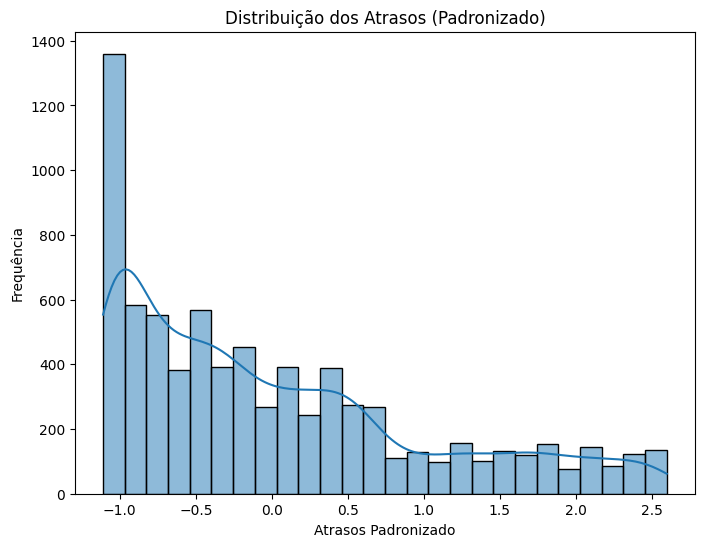

In [384]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Atrasos'], kde=True)
plt.title('Distribuição dos Atrasos (Padronizado)')
plt.xlabel('Atrasos Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de Atrasos após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

# Conclusão
A análise e o pré-processamento realizados sobre os dados de inadimplência de clientes evidenciaram a relevância de compreender a estrutura e a distribuição das variáveis antes da aplicação de modelos preditivos. O dataset apresentou variáveis mistas (numéricas e categóricas), sendo necessário tratá-las por meio de transformações como codificação de variáveis (dummy encoding) e normalização para preparar os dados adequadamente. A análise exploratória revelou insights relevantes sobre o perfil dos clientes inadimplentes, como a relação entre dias de atraso do pagamento, renda mensal, tempo de relacionamento com a empresa, valor da fatura e gasto com alimentação.

A utilização de gráficos como histogramas e mapas de calor ajudou a visualizar a distribuição dos dados e as correlações entre variáveis, como por exemplo que que a relação dos atributos com a resposta do modelo está mais ligada com a combinação de variáveis do que de uma isoladamente. Esses gráficos facilitam a identificação de padrões e possíveis outliers, que também foram tratados durante a análise.

As hipóteses levantadas no início da análise foram validadas:

1. **Clientes com maior número de atrasos tendem a ter maior probabilidade de inadimplência:** Tem uma leve correlação de 0.38, porém ela é importante e precisa ser considerada ao avaliar o modelo.

2. **Regiões de risco mais altas (III e IV) estão associadas a maior inadimplência:** Na verdade, foi validado o contrário na tabela de comparação de Região de Risco e Resposta. Regiões de Risco I e II têm mais probabilidade de inadimplência.

3. **Clientes com menor tempo de relacionamento (TempoRel) apresentam maior risco:** Sim, com a análise no boxplot, é possível comprovar esta hipótese.

4. **Existe uma relação entre o valor médio da fatura e a capacidade de pagamento (RendaMensal):** Não existe essa relação, como comprovada na matriz de correlação.

5. **Um alto percentual de gastos com alimentação pode estar relacionado a menor capacidade de pagamento:** Não, na verdade foi comprovado no boxplot que quanto maior o percentual de gastos com alimentação, maior a capacidade de pagamento, apesar dessa correlação ser leve.

